In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

In [3]:
def posterior_linreg(X, y, alpha, beta):
    N, M = X.shape
    m0 = np.zeros(M)
    S0_inv = alpha * np.eye(M)
    SN_inv = S0_inv + beta * X.T @ X
    
    SN = np.linalg.inv(SN_inv)
    mN = SN @ (S0_inv @ m0 + beta * X.T @ y)
    
    _, logdetSN = np.linalg.slogdet(SN)
    logL = (M * np.log(alpha) + N * np.log(beta)
         - beta * (y - X @ mN) @ (y - X @ mN)
         - M * np.log(2 * np.pi) - alpha * mN @ mN + logdetSN) / 2
    
    return mN, SN, logL

def generate_data(N, seed):
    np.random.seed(seed)
    x_train = np.random.uniform(0, 10, N)
    noise = np.random.normal(size=N)
    y_train = (x_train - 4.0) ** 2 + 5 * noise

    x_true = np.linspace(-2, 12.1, 100)
    y_true = (x_true - 4.0) ** 2
    return (x_train, y_train), (x_true, y_true)

In [4]:
(x_train, y_train), (x_true, y_true) = generate_data(30, 1)

In [5]:
np.random.seed(1)
N = 5
x_train = np.random.uniform(0, 10, N)
noise = np.random.normal(size=N)
y_train = (x_train - 4.0) ** 2 + 5 * noise

x_range = np.linspace(-2, 12.1, 100)
y_true = (x_range - 4.0) **2 

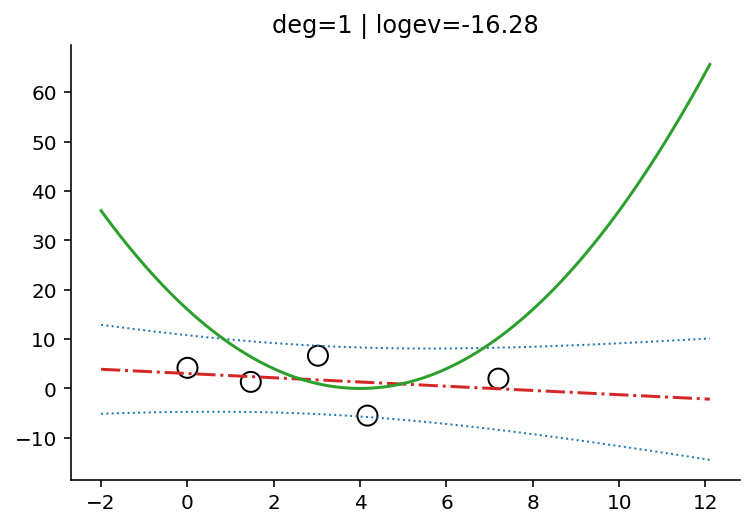

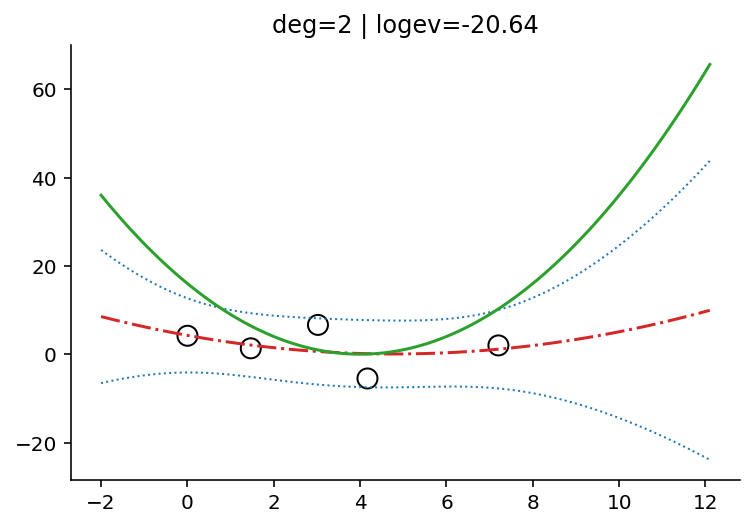

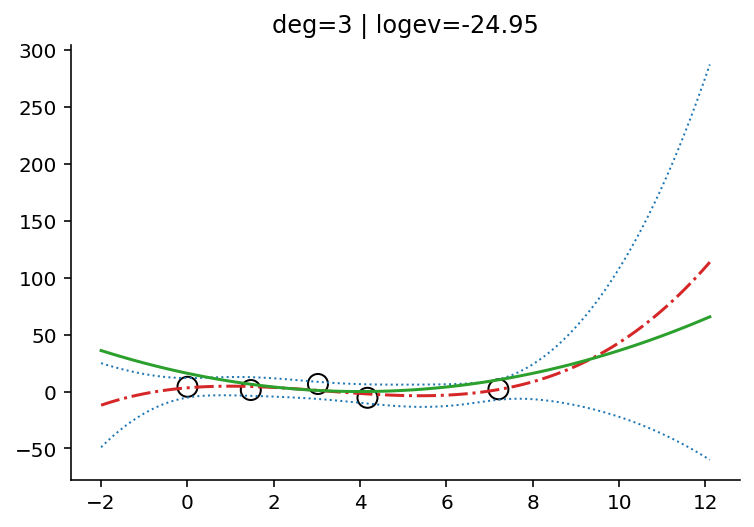

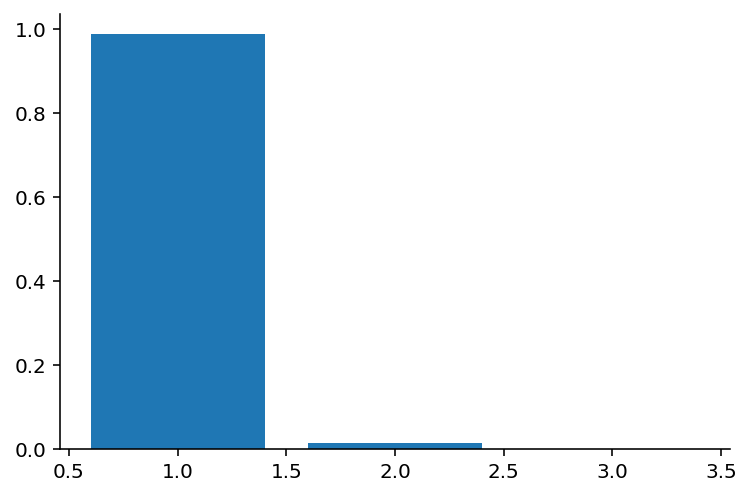

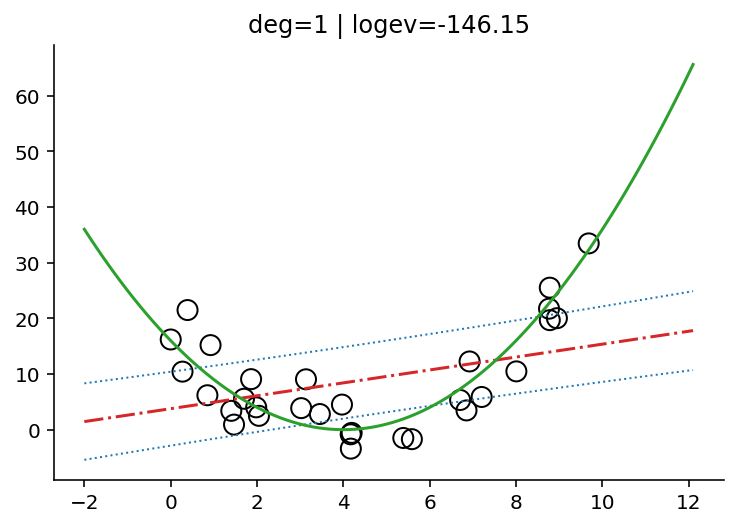

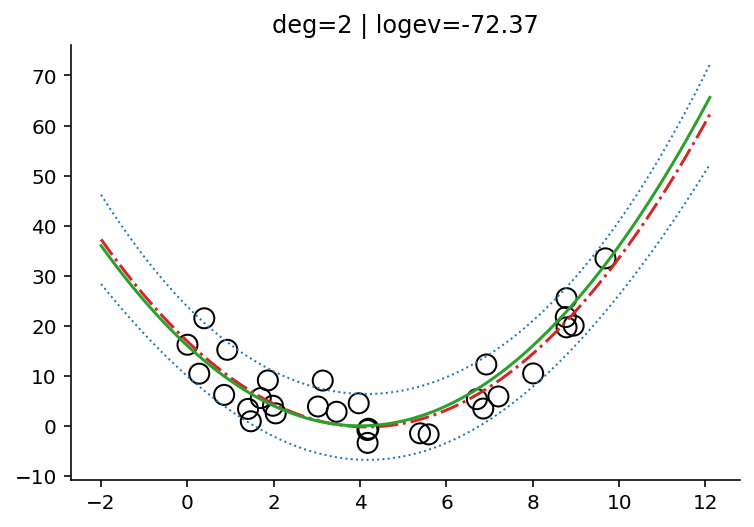

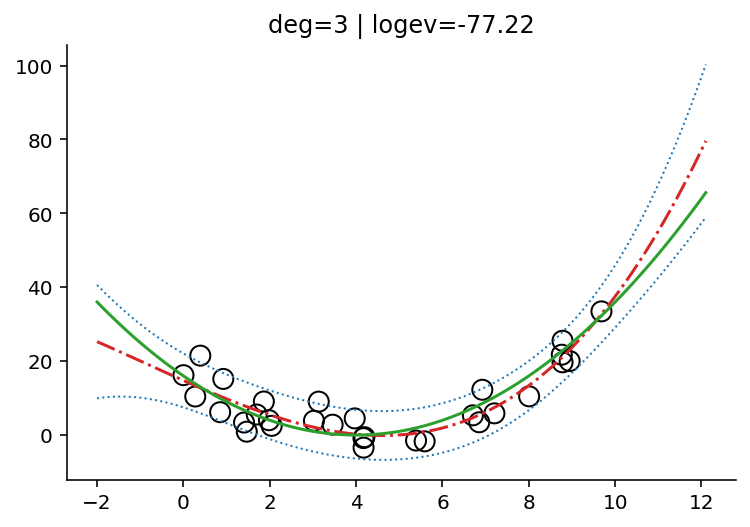

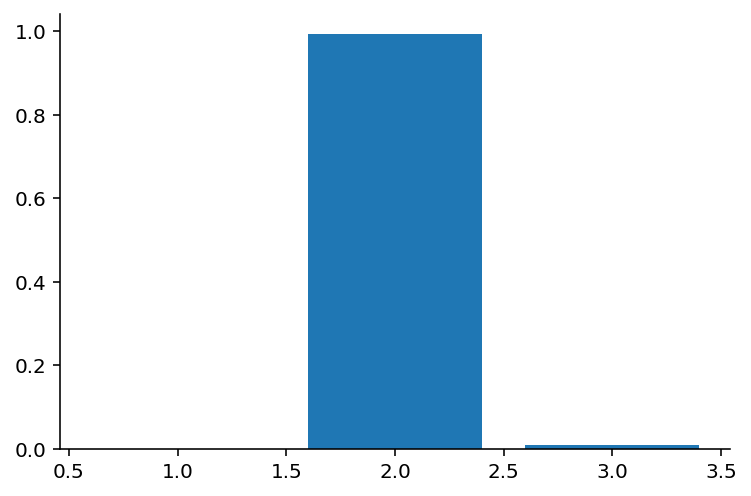

In [6]:
alpha, beta = 0.01, 0.1
N_values = [5, 30]
deg_values = [1,2,3]

for N in N_values:
    logLs = []
    (x_train, y_train), (x_true, y_true) = generate_data(N, 1)
    for deg in deg_values:
        fig, ax = plt.subplots()

        pf = PolynomialFeatures(degree=deg)
        X_train = pf.fit_transform(x_train[:, None])

        mN, SN, logL = posterior_linreg(X_train, y_train, alpha, beta)

        X_true = pf.fit_transform(x_true[:, None])
        y_est_std = np.sqrt(1 / beta + np.einsum("nm,mk,nk->n", X_true, SN, X_true))
        y_est_mean = X_true @ mN
        logLs.append(logL)

        plt.plot(x_true, y_est_mean + 2 * y_est_std, c="tab:blue", linewidth=1, linestyle="dotted")
        plt.plot(x_true, y_est_mean - 2 * y_est_std, c="tab:blue", linewidth=1, linestyle="dotted")
        plt.plot(x_true, y_est_mean, c="tab:red", linestyle="-.")
        plt.scatter(x_train, y_train, edgecolor="black", c="none", s=100)
        plt.plot(x_true, y_true, c="tab:green")
        plt.title(f"{deg=} | logev={logL:0.2f}")
    
    fig, ax = plt.subplots()
    L_norm = np.exp(logLs)
    L_norm = L_norm / L_norm.sum()
    plt.bar(deg_values, L_norm)